# sentimental analysis_GRU

Importing libraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import re
import matplotlib.pyplot as plt
from keras import api, layers, optimizers, preprocessing
from keras.src.legacy.preprocessing.text import Tokenizer
from keras.api.preprocessing.sequence import pad_sequences

Paths to text files and reading

In [2]:
path_train_data_positive = 'train_positive/train_positive.txt'
path_train_data_negative = 'train_negative/train_negative.txt'

In [3]:
with open(path_train_data_positive, 'r', encoding='utf-8') as file:
    text_positive = file.readlines()
    text_positive[0] = text_positive[0].replace('\ufeff', '')

In [4]:
with open(path_train_data_negative, 'r', encoding='utf-8') as file:
    text_negative = file.readlines()
    text_negative[0] = text_negative[0].replace('\ufeff', '')

In [5]:
text = text_positive + text_negative
count_positive = len(text_positive)
count_negative = len(text_negative)
total_line = count_positive + count_negative
print(total_line, count_negative, count_positive)

172 88 84


In [6]:
maxWordCount = 1000
test = text[0]
tokenizer = Tokenizer(maxWordCount, char_level=False, lower=True, split=' ') # Create a tokenizer
tokenizer.fit_on_texts(text) # train the tokenizer on our text
dict_of_word = tokenizer.index_word  # We create a dictionary in which each word corresponds to a certain number
print(dict_of_word)
max_text_len = 10
data = tokenizer.texts_to_sequences(text) # We form a sequence in which words are replaced by corresponding numbers
data_pad = pad_sequences(data, maxlen=max_text_len)# We normalize each sequence. The length should be equal to 10. We cut off everything unnecessary, add zeros to short sequences on the left.

{1: 'не', 2: 'и', 3: 'в', 4: 'вы', 5: 'на', 6: 'я', 7: 'а', 8: 'только', 9: 'что', 10: 'все', 11: 'это', 12: 'если', 13: 'жизнь', 14: 'просто', 15: 'с', 16: 'чем', 17: 'никогда', 18: 'чтобы', 19: 'к', 20: 'у', 21: '—', 22: 'больше', 23: 'себя', 24: 'то', 25: 'всегда', 26: 'вас', 27: 'меня', 28: 'за', 29: 'вам', 30: 'когда', 31: 'от', 32: 'мне', 33: 'быть', 34: 'жизни', 35: 'есть', 36: 'но', 37: 'сделать', 38: 'без', 39: 'позитивным', 40: 'никому', 41: 'как', 42: 'ты', 43: 'тем', 44: 'для', 45: 'день', 46: 'позитивное', 47: 'своих', 48: 'мы', 49: 'много', 50: 'тебя', 51: 'никто', 52: 'такой', 53: '–', 54: 'деньги', 55: 'денег', 56: 'позитивно', 57: 'свою', 58: 'которые', 59: 'значит', 60: 'так', 61: 'них', 62: 'мечты', 63: 'нужно', 64: 'того', 65: 'ничего', 66: 'лучше', 67: 'надо', 68: 'верьте', 69: 'понедельник', 70: 'живи', 71: 'позволяйте', 72: 'хорошее', 73: 'можете', 74: 'ваши', 75: 'других', 76: 'делай', 77: 'тебе', 78: 'можешь', 79: 'успеха', 80: 'ваша', 81: 'стоит', 82: 'себе', 

Forming a training sample

In [7]:
X = data_pad
Y = np.array([[1, 0]] * count_positive + [[0 , 1]] * count_negative)
print(X.shape, Y.shape)

(172, 10) (172, 2)


In [8]:
indeces = np.random.choice(X.shape[0], size=X.shape[0], replace=False) # Mixing the sample
X = X[indeces]
Y = Y[indeces]

Creating a neural network model

In [16]:
model = api.Sequential() 
model.add(layers.Embedding(input_dim=maxWordCount, output_dim=128)) # We will feed the input with a tensor of dimension (172, 10).Number of output neurons 128
model.add(layers.GRU(128, return_sequences=True)) # Add a GRU layer. The number of neurons in the fully connected layers of GRU block is 128.At the output we form a sequence.
model.add(layers.GRU(64)) # Return the last value of the sequence
model.add(api.layers.Dense(units=2, activation='softmax'))#Linear layer for predicting the result.

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=api.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x=X, y=Y, batch_size=32, epochs=100)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.3891 - loss: 0.6952
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5484 - loss: 0.6907
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5874 - loss: 0.6872
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5511 - loss: 0.6856
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6213 - loss: 0.6797
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6423 - loss: 0.6781
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7329 - loss: 0.6702
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7713 - loss: 0.6625
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8034 - loss: 0.6508
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8052 - loss: 0.6425
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8630 - loss: 0.6176
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8960 - lo

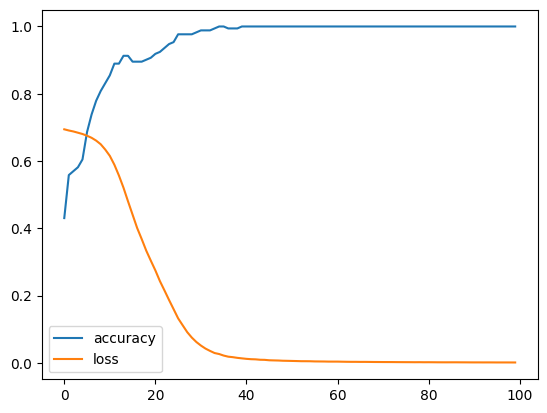

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(('accuracy','loss'))

In [20]:
def get_sentimental(text):
    text_seq = tokenizer.texts_to_sequences([text.lower()])
    print(f"Words used:: {seq_to_text(text_seq)}")
    inp = pad_sequences(text_seq, maxlen=max_text_len)
    pred = np.argmax(model.predict(inp))
    return 'negation' if pred == 1 else 'positive'

def seq_to_text(list_of_index):
    words = [dict_of_word[elem] for elem in list_of_index[0]]
    return words

In [22]:
print(f"Результат : {get_sentimental('Это самый лучший день в моей жизни')}")
print(f"Результат : {get_sentimental('Это очень плохое выссказывание')}")

Words used:: ['это', 'лучший', 'день', 'в', 'жизни']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Результат : positive
Words used:: ['это', 'очень', 'плохое']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Результат : negation
